In [1]:
# Verify installation - 
import tensorflow as tf

In [2]:
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.1.0
Keras Version: 2.2.4-tf


In [3]:
tf.config.list_physical_devices('GPU')

[]

# This shows that no GPU is activated.

In [4]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
CheckList = ["GPU", "CPU"]
for device in CheckList:
    out_ = tf.config.list_physical_devices(device)    
    if len(out_) > 0:
        print(f"{device} is available")        
        print("details\n",out_)
    else:
        print(f"{device} not available")

GPU not available
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

### Working on mnist dataset - 

* This dataset contains handwritten digits. 
* It has 10 classes i.e. 0 to 9
* Each data point is 2D array of 28x28 size.
* Also known as hello world dataset for ANN

[image source](https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png)

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [7]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [8]:
X_train_full[5].shape # This image is made up of pixels .....

(28, 28)

In [9]:
X_train_full[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
X_train_full.shape  #This shape is made up of pixels , so there are 60000 arrays in the data set , each ahving 28*28 elements 

(60000, 28, 28)

In [11]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


In [12]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


### Viewing the single data 

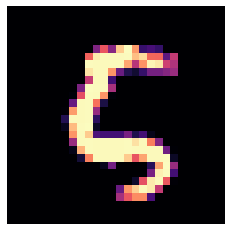

In [13]:
plt.imshow(X_train_full[2000], cmap="magma")
plt.axis('off')
plt.show()

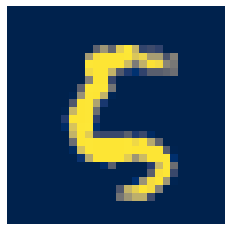

In [14]:
plt.imshow(X_train_full[2000], cmap="cividis")
plt.axis('off')
plt.show()

In [15]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

 

### Now check the normalize data -



In [16]:
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

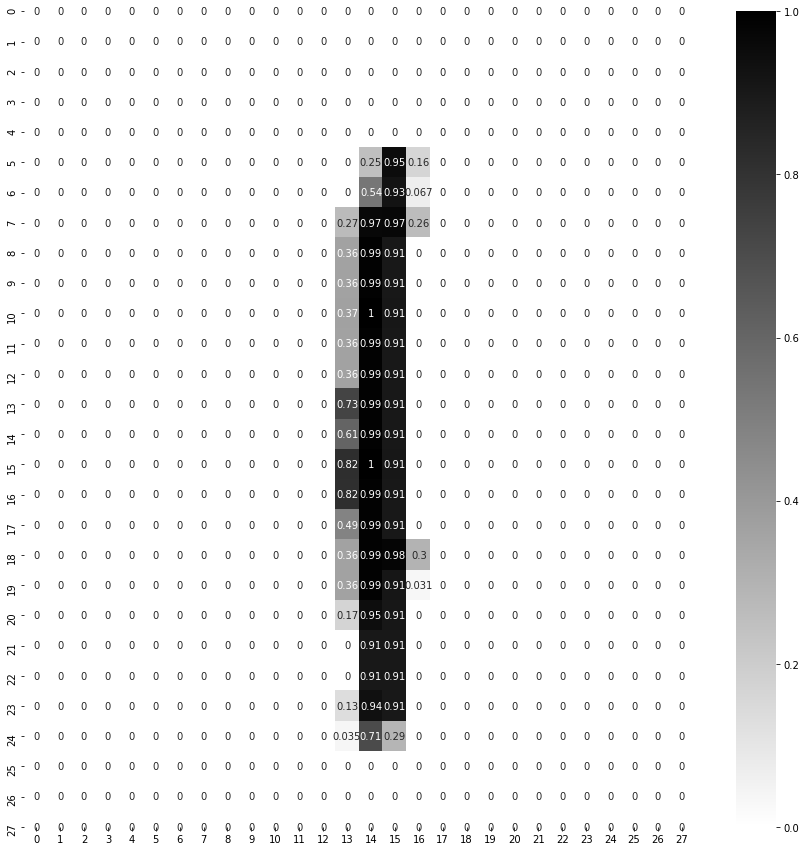

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[9000], annot=True, cmap="binary")

In [18]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer3"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer4"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer5"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer6"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer7"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer8"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

Initially we provide the input layer and the shape we provide is 28, 28 , then we create hidden layers , and finally output layers , 300, 100 represents neurons . These are experimental methods, no hard and fast rule , you have to check. Models.sequential helps to pass your layers in the network. 

In [19]:
model_clf.layers

### This will simply provide the information of the layers

In [20]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
hiddenLayer3 (Dense)         (None, 100)               10100     
_________________________________________________________________
hiddenLayer4 (Dense)         (None, 100)               10100     
_________________________________________________________________
hiddenLayer5 (Dense)         (None, 100)               10100     
_________________________________________________________________
hiddenLayer6 (Dense)         (None, 100)               1

### This shows number of parammeters or wiegths which are involved in the calculation 

how to calculate = 300(No of neurons) * (28*28)

In [21]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [22]:
type(hidden1.get_weights())

list

In [23]:
hidden1.get_weights()

[array([[-0.0394273 , -0.04321682,  0.00766298, ..., -0.04654892,
          0.02372631,  0.01206744],
        [ 0.06070064, -0.05351225,  0.02546056, ...,  0.03530812,
          0.0250326 ,  0.03350189],
        [ 0.03476635, -0.07091168,  0.03706688, ..., -0.00322495,
         -0.03397161,  0.06231429],
        ...,
        [ 0.06624441, -0.0456138 , -0.06946386, ...,  0.04461066,
          0.03325222,  0.04411938],
        [ 0.02321351, -0.05401164,  0.04416703, ...,  0.00189291,
          0.0123415 , -0.02951488],
        [ 0.05396719,  0.02491108, -0.02180328, ...,  0.0736848 ,
          0.02567038,  0.02953363]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights.shape

(784, 300)

Both weights and biases have to be called upon in order to get weights. 

In [26]:
biases.shape

(300,)

In [27]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)



In [28]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 15s 268us/sample - loss: 1.1752 - accuracy: 0.5935 - val_loss: 0.3433 - val_accuracy: 0.8980
Epoch 2/30
55000/55000 [==============================] - 13s 238us/sample - loss: 0.2652 - accuracy: 0.9220 - val_loss: 0.1879 - val_accuracy: 0.9470
Epoch 3/30
55000/55000 [==============================] - 14s 251us/sample - loss: 0.1687 - accuracy: 0.9513 - val_loss: 0.1365 - val_accuracy: 0.9596
Epoch 4/30
55000/55000 [==============================] - 14s 251us/sample - loss: 0.1236 - accuracy: 0.9638 - val_loss: 0.1260 - val_accuracy: 0.9628
Epoch 5/30
55000/55000 [==============================] - 13s 242us/sample - loss: 0.0982 - accuracy: 0.9711 - val_loss: 0.1111 - val_accuracy: 0.9658
Epoch 6/30
55000/55000 [==============================] - 13s 232us/sample - loss: 0.0797 - accuracy: 0.9766 - val_loss: 0.1122 - val_accuracy: 0.9676
Epoch 7/30
55000/55000 [=====================

### Accuracy increased from 62% to 99.9 %

In [29]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [30]:
UNIQUE_PATH = model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS\Model_2020_11_23_21_39_25_.h5


In [31]:
history.params


{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

![title](img/neutron.png)

In [32]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.175169,0.593509,0.343263,0.8980
1,0.265213,0.921964,0.187893,0.9470
2,0.168673,0.951327,0.136510,0.9596
3,0.123592,0.963836,0.126022,0.9628
4,0.098165,0.971091,0.111134,0.9658
5,0.079695,0.976618,0.112187,0.9676
6,0.065464,0.980400,0.087736,0.9744
7,0.053740,0.983782,0.086578,0.9736
8,0.044924,0.986836,0.094817,0.9732
9,0.036201,0.989345,0.091885,0.9738


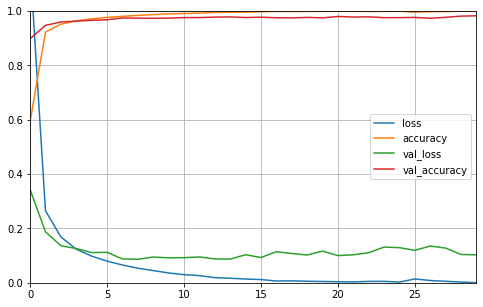

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

We are converting the data into plots to see how the accuracy is changing. 

In [34]:
model_clf.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 114us/sample - loss: 0.1195 - accuracy: 0.9784


[0.11947774715885755, 0.9784]

### Accuracy is 97% 

### Now we are passing three arrays, and checking how the things work here. 

In [35]:
X_new = X_test[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

In [37]:
y_test_new = y_test[:8]

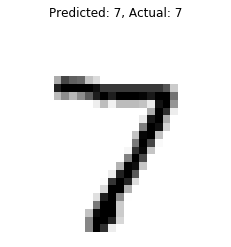

------------------------------------------------------------


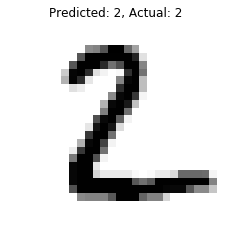

------------------------------------------------------------


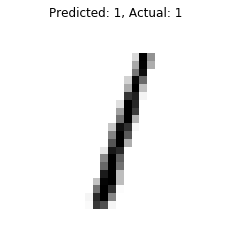

------------------------------------------------------------


In [38]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

In [ ]:
import cv2
img = mpimg.imread('eight.jpg') 
im = cv2.resize(img,  (28, 28)) 
im.shape
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
   
gray = rgb2gray(im)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()